In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("nuovo_dataset_totale.csv")

numeric_df = df.select_dtypes(include=np.number)

X=numeric_df.values

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)


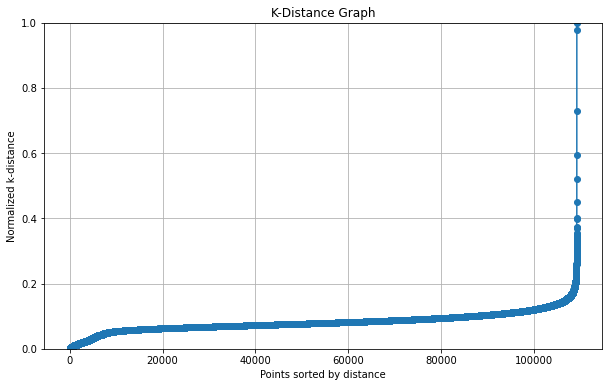

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Function to calculate k-distance graph
def calculate_k_distance(X, k):
    # Fit nearest neighbors model
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X)
    distances, _ = nn.kneighbors(X)
    # Calculate k-distance for each point
    k_distances = np.max(distances, axis=1)
    # Sort distances in ascending order
    k_distances_sorted = np.sort(k_distances)
    # Normalize distances to range [0, 1]
    k_distances_sorted = (k_distances_sorted - np.min(k_distances_sorted)) / (np.max(k_distances_sorted) - np.min(k_distances_sorted))
    return k_distances_sorted

# Function to plot k-distance graph
def plot_k_distance_graph(k_distances_sorted):
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(k_distances_sorted) + 1), k_distances_sorted, marker='o', linestyle='-')
    plt.xlabel('Points sorted by distance')
    plt.ylabel('Normalized k-distance')
    plt.title('K-Distance Graph')
    plt.ylim(0, 1.0)  # Set y-axis limits to [0, 1.0]
    plt.grid(True)
    plt.show()

# Example usage
# X is your data
# k is the minimum number of points required to form a dense region
k = 5  # Example value of k
k_distances_sorted = calculate_k_distance(X, k)
plot_k_distance_graph(k_distances_sorted)


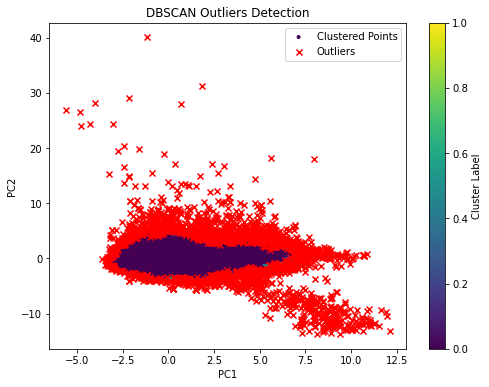

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Initialize PCA with 3 components
pca = PCA(n_components=2)

# Fit PCA to your data and transform it
X_pca = pca.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
cluster_labels = dbscan.fit_predict(X_pca)

# Find indices of outliers (points labeled as -1 by DBSCAN)
outlier_indices = np.where(cluster_labels == -1)[0]

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot points belonging to clusters
plt.scatter(X_pca[cluster_labels != -1, 0], X_pca[cluster_labels != -1, 1], c=cluster_labels[cluster_labels != -1], marker='.', label='Clustered Points')

# Plot outliers separately with a different marker
plt.scatter(X_pca[outlier_indices, 0], X_pca[outlier_indices, 1], c='red', marker='x', label='Outliers')

plt.title("DBSCAN Outliers Detection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

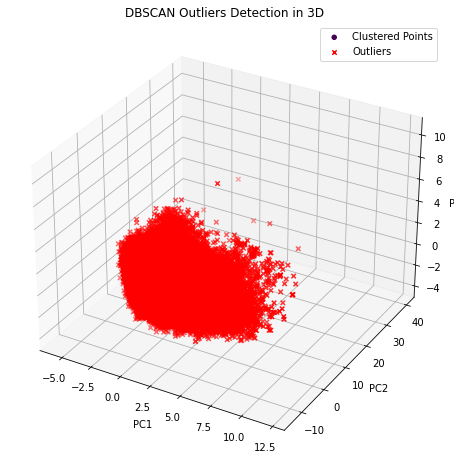

In [28]:
# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA to your data and transform it
X_pca = pca.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
cluster_labels = dbscan.fit_predict(X_pca)

# Find indices of outliers (points labeled as -1 by DBSCAN)
outlier_indices = np.where(cluster_labels == -1)[0]

# Plot the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot clustered points
clustered_points_mask = cluster_labels != -1
ax.scatter(X_pca[clustered_points_mask, 0], X_pca[clustered_points_mask, 1], X_pca[clustered_points_mask, 2], c=cluster_labels[clustered_points_mask], cmap='viridis', marker='o', label='Clustered Points')

# Plot outliers separately with a different marker
ax.scatter(X_pca[outlier_indices, 0], X_pca[outlier_indices, 1], X_pca[outlier_indices, 2], c='red', marker='x', label='Outliers')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('DBSCAN Outliers Detection in 3D')
plt.legend()
plt.show()

In [23]:
np.unique(dbscan.labels_, return_counts=True)

(array([  -1,    0,    1, ..., 1720, 1721, 1722], dtype=int64),
 array([39711, 52769,     8, ...,     5,     5,     5], dtype=int64))

In [24]:
df.loc[np.where(dbscan.labels_==-1)].select_dtypes(include=np.number)

,Unnamed: 0,disc_number,duration_ms,popularity,track_number,album_total_tracks,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars
0,0,1.0,290.48,52.0,5.0,13.0,0.53,0.52,0.0,-9.85,...,0.54,0.09,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0
1,1,1.0,539.23,45.0,5.0,8.0,0.75,0.34,5.0,-12.76,...,0.65,0.11,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0
2,2,1.0,264.20,39.0,5.0,10.0,0.80,0.64,7.0,-10.68,...,0.47,0.07,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0
3,3,1.0,387.41,0.0,6.0,7.0,0.68,0.54,6.0,-11.98,...,0.72,0.11,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0
5,5,1.0,501.74,47.0,1.0,1.0,0.63,0.86,2.0,-6.87,...,0.86,0.06,0.24,122.99,4.0,0.72,1.00,0.64,0.55,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109115,109513,1.0,178.28,1.0,2.0,30.0,0.62,0.82,8.0,-2.47,...,0.04,0.15,0.18,139.97,4.0,0.17,0.97,0.00,0.33,99.0
109116,109514,1.0,231.72,43.0,1.0,1.0,0.66,0.93,9.0,-3.06,...,0.00,0.20,0.52,174.01,4.0,0.39,1.00,0.30,0.30,170.0
109118,109516,1.0,205.16,43.0,3.0,12.0,0.54,0.94,5.0,-0.91,...,0.00,0.28,0.23,173.93,4.0,0.50,1.00,0.16,0.18,148.0
109137,109535,1.0,176.00,67.0,1.0,1.0,0.51,0.86,6.0,-1.42,...,0.00,0.09,0.41,150.07,4.0,0.74,1.00,0.25,0.32,107.0
